# Question 01 : Logistic Regression Weight Update Process

In [1]:
import numpy as np
import matplotlib . pyplot as plt
from sklearn . datasets import make_blobs

# Generate synthetic data
np. random . seed (0)
centers = [[ -5 , 0], [0, 1.5]]
X, y = make_blobs ( n_samples =1000 , centers = centers ,random_state =40)
transformation = [[0.4 , 0.2] , [ -0.4 , 1.2]]
X = np.dot(X, transformation )

# Add a bias term to the feature matrix
X = np.c_[np. ones ((X. shape [0] , 1)), X]

# Initialize coefficients
W = np. zeros (X. shape [1])

# Define the logistic sigmoid function
def sigmoid (z):
    return 1 / (1 + np.exp(-z))

# Define the logistic loss ( binary cross - entropy)function
def log_loss (y_true , y_pred ):
    epsilon = 1e-15
    y_pred = np. clip (y_pred , epsilon , 1 - epsilon ) # Clipto avoid log (0)
    return - ( y_true * np. log ( y_pred ) + (1 - y_true ) * np.log (1 - y_pred ))

# Gradient descent and Newton method parameters
learning_rate = 0.1
iterations = 10
loss_history_BGD= []
loss_history_Newton = []

In [2]:
one_matrix = np.ones((X.shape[0], 1))
W=W.reshape(3,1)
y=y.reshape(len(y),1)

# Performing Batch Gradient Descent
for i in range(iterations):
    # Predict using the current weights (W) with the sigmoid function
    y_pred = sigmoid(np.dot(X, W))
    
    # Calculate the logistic loss for the current predictions
    loss = log_loss(y, y_pred)
    
    # Append the total loss to the history list
    loss_history_BGD.append(np.sum(np.mean(loss)))
    
    # Calculate the residual (difference between predictions and true labels)
    residual = y_pred - y
    residual = residual.reshape(len(residual))
    
    # Create a diagonal matrix using the residuals
    diagonal_residual = np.diag(residual)
    
    # Compute the gradient using matrix multiplication
    gradient = one_matrix.T @ diagonal_residual @ X
    
    # Normalize the gradient 
    gradient = gradient.T / y.size
    
    # Update the weights using the learning rate and the gradient
    W -= learning_rate * gradient
    
    # Print the current iteration and loss
    print(f'Iteration {i}: Loss {loss_history_BGD[i]}')

Iteration 0: Loss 0.6931471805599454
Iteration 1: Loss 0.6328211522065751
Iteration 2: Loss 0.5823972949578101
Iteration 3: Loss 0.5400400231011129
Iteration 4: Loss 0.5042051102371915
Iteration 5: Loss 0.4736389534183553
Iteration 6: Loss 0.44734329598374695
Iteration 7: Loss 0.4245298511469433
Iteration 8: Loss 0.4045770169455826
Iteration 9: Loss 0.38699321002389653


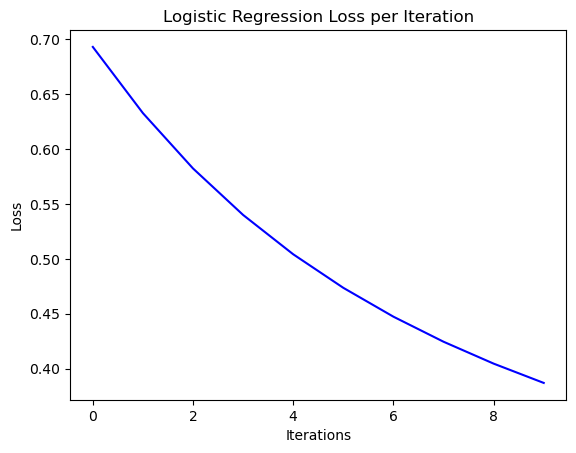

In [31]:
# Plotting the loss function 
plt.figure()
plt.plot(np.arange(iterations), loss_history_BGD, color='blue')

# Adding title and labels
plt.title('Logistic Regression Loss per Iteration')
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Display the plot
plt.show()



In [5]:
# Perform Newton's method
W = np.zeros(X.shape[1])
W = W.reshape(3, 1)
for i in range(iterations):
    # Predict using the current weights (W) with the sigmoid function
    y_pred = sigmoid(np.dot(X, W))

    # Calculate the 's' term for Newton's method
    s = (y_pred - y) * (1 - y_pred - y)
    s = s.reshape(len(s))
    # Create a diagonal matrix 
    S = np.diag(s)

    # Calculate the multiplication factor 'a' for Newton's method
    mulfact_a = X.T @ S @ X
    mulfact_a = mulfact_a / y.size
    mulfact_a = np.linalg.inv(mulfact_a)

    # Calculate the logistic loss for the current predictions and find the total loss
    loss = log_loss(y, y_pred)
    loss_history_Newton.append(np.sum(np.mean(loss)))

    # Calculate the residual (difference between predictions and true labels)
    residual = y_pred - y
    residual = residual.reshape(len(residual))
    diagonal_residual = np.diag(residual)

    # Calculate the multiplication factor and Update the weights using Newton's method
    mulfact_b = one_matrix.T @ diagonal_residual @ X
    mulfact_b = mulfact_b.T / y.size
    W -= mulfact_a @ mulfact_b

    # Print the current iteration and loss
    print(f'Iteration {i}: Loss {loss_history_Newton[i]}')


Iteration 0: Loss 0.6931471805599454
Iteration 1: Loss 0.19326424132410197
Iteration 2: Loss 0.09113723316903426
Iteration 3: Loss 0.04938058810733573
Iteration 4: Loss 0.030716074598479783
Iteration 5: Loss 0.022022549931970475
Iteration 6: Loss 0.018073560453997193
Iteration 7: Loss 0.01661803272262814
Iteration 8: Loss 0.016323457755770703
Iteration 9: Loss 0.01630719622923481


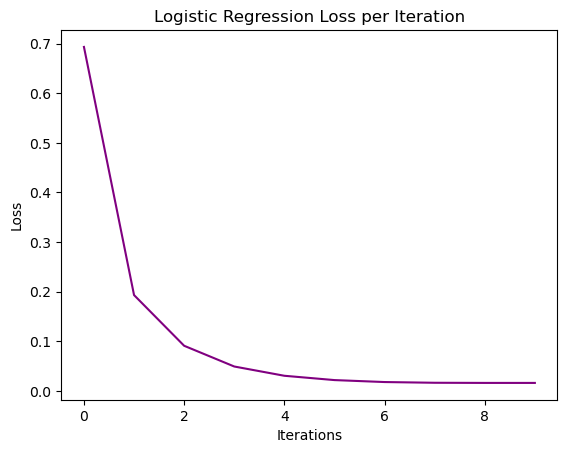

In [27]:
plt.figure()
plt.plot(np.arange(iterations), loss_history_Newton, color='purple')

# Adding title and labels
plt.title('Logistic Regression Loss per Iteration')
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Display the plot
plt.show()


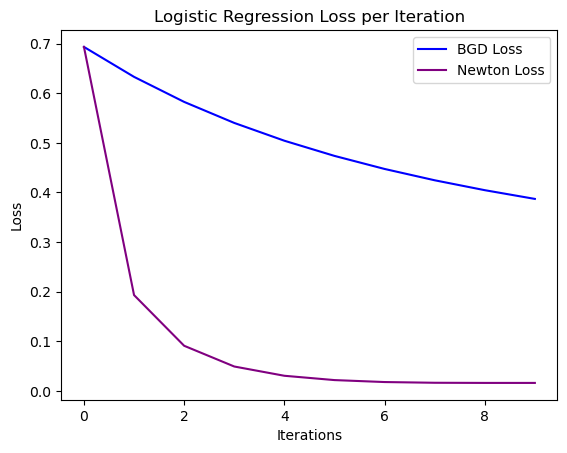

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Plotting the loss
plt.figure()
plt.plot(np.arange(iterations), loss_history_BGD, label='BGD Loss', color='blue')
plt.plot(np.arange(iterations), loss_history_Newton, label='Newton Loss', color='purple')

# Adding title and labels
plt.title('Logistic Regression Loss per Iteration')
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Adding legend
plt.legend()

# Display the plot
plt.show()
